In [1]:
from graphviz import Digraph

# Code for the visualization


In [94]:
def trace(root):
	nodes, edges = set(), set()
	
	def build(v):
		if v not in nodes:
			nodes.add(v)
			for child in v._prev:
				edges.add((child, v))
				build(child)
	build(root)
	return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):

	assert rankdir in ['LR', 'TB']
	nodes, edges = trace(root)

	dot = Digraph(format=format, graph_attr={'rankdir': rankdir})

	for n in nodes:
		uid = str(id(n))
		dot.node(name=uid, label= "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
		if n._op:
			dot.node(name=uid + n._op, label=n._op)
			dot.edge(uid + n._op, uid)

	for n1, n2 in edges:
		dot.edge(str(id(n1)), str(id(n2)) + n2._op, label=f"d{n2.label}/d{n1.label}")

	return dot


# Classes for the implementation


In [98]:
class Value:

    def __init__(self, data, _children = (), _op = '', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(Data={self.data})"
    
    # Operations
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    


In [108]:
def test():
    h = 0.001

    a = Value(4, label='a')
    b = Value(2.0, label='b')
    c = Value(5, label='c')
    x = Value(-3.0, label='x')
    d = b*c; d.label = 'd'
    e = x+d; e.label = 'e'
    L = e+a; L.label = 'L'
    
    L1 = L.data

    a = Value(4, label='a')
    b = Value(2.0, label='b')
    c = Value(5, label='c')
    x = Value(-3.0, label='x')
    
    d = b*c; d.label = 'd'
    e = x+d; e.label = 'e'
    L = e+a; L.label = 'L'
    
    L2 = L.data + h

    print((L2-L1)/h)

test()

0.9999999999994458


In [ ]:

a = Value(4, label='a')
b = Value(2.0, label='b')
c = Value(5, label='c')
x = Value(-3.0, label='x')

# x + b*c + a

d = b*c; d.label = 'd'
e = x+d; e.label = 'e'
L = e+a; L.label = 'L'

L


Value(Data=11.0)

# Gradients 

at output - dL/dL = 1 

L = e+a
1 level back (level of e and a)
dL/da = 1 
dL/de = 1

e = x+d
1 level back (level of x and d)
dL / dd = ?
dL / dd = dL/de * de/dd
de / dd = 1
dL/dd = 1*1 = 1
(Same cases for x)

d = b*c
1 level back (level of b and c)

dL/db = ?
b -> d -> e -> l
dL/db = dL/de * de/dd * dd/db
dd/db = c (data of c)
dL/db = 5 * 1 * 1

(Same for c)
dL/dc = dL/de * de/dd * dd/dc = 2 * 1 * 1 = 2



In [106]:
L.grad = 1.0
e.grad, a.grad = 1.0, 1.0
d.grad, x.grad = 1.0, 1.0
b.grad, c.grad = 5.0, 2.0




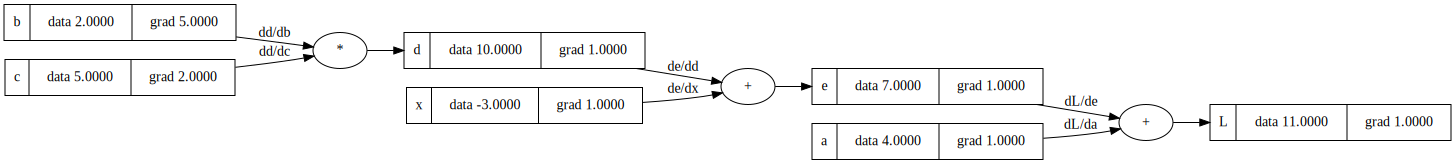

In [107]:
draw_dot(L)